In [106]:
import os
import pathlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
PAYMENTS_MAIN_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "raw" / "payments_main.tsv"
PAYMENTS_TRAINING_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "raw" / "payments_training.tsv"

In [108]:
PAYMENTS_MAIN_NEW_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "processed" / "payments_main.tsv"
PAYMENTS_TRAINING_NEW_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "processed" / "payments_training.tsv"

In [109]:
df_main = pd.read_csv(PAYMENTS_MAIN_PATH, sep="\t", index_col=0, names=['Date', 'Amount', 'Description'])
df_main.head()

,Date,Amount,Description
1,07.11.2024,40500.00,За тур.поездку по договору №001 от 27.01.2023г
2,07.11.2024,"32600,00",За оказание услуг по договору №53Б-02746 от 23...
3,07.11.2024,4710-00,Оплата штрафа
4,07.11.2024,30900-00,Лечение по договору №Д-00359/24 от 08.03.2025
5,07.11.2024,13200.00,Оплата основного долга за период с 16.12.2024г...


In [110]:
df_train = pd.read_csv(PAYMENTS_TRAINING_PATH, sep="\t", index_col=0, names=['Date', 'Amount', 'Description', 'Category'])
df_train['Category'] = df_train['Category'].replace({'REALE_STATE': 'REAL_ESTATE'})
df_train.head()

,Date,Amount,Description,Category
1,07.11.2024,15300.00,За участие в конференции в г. Майкоп по догово...,SERVICE
2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED


In [111]:
df_train

,Date,Amount,Description,Category
1,07.11.2024,15300.00,За участие в конференции в г. Майкоп по догово...,SERVICE
2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
...,...,...,...,...
496,07.11.2024,2610.00,Оплата налогов,TAX
497,07.11.2024,31200-00,Комиссия за выполнение функций агента валютног...,BANK_SERVICE
498,07.11.2024,18200-00,За тур.поездку по договору №75-04243Г от 24/04...,SERVICE
499,07.11.2024,"2870000,00","Оплата по договору №095 от 24.02.2025г, счету ...",FOOD_GOODS


In [112]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1 to 25000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         25000 non-null  object
 1   Amount       25000 non-null  object
 2   Description  25000 non-null  object
dtypes: object(3)
memory usage: 781.2+ KB


In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         500 non-null    object
 1   Amount       500 non-null    object
 2   Description  500 non-null    object
 3   Category     500 non-null    object
dtypes: object(4)
memory usage: 19.5+ KB


In [114]:
value_counts = df_train['Category'].value_counts()
value_counts

Category
NON_FOOD_GOODS    96
FOOD_GOODS        90
SERVICE           88
BANK_SERVICE      49
TAX               48
LOAN              41
LEASING           38
REAL_ESTATE       27
NOT_CLASSIFIED    23
Name: count, dtype: int64

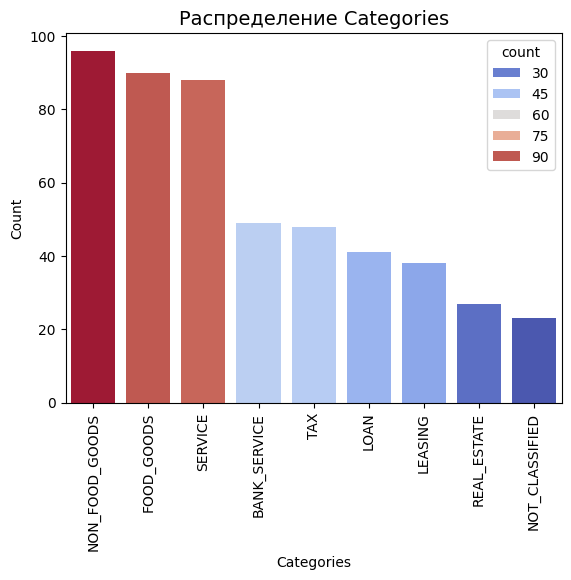

In [115]:
sns.barplot(
    x=value_counts.index,
    y=value_counts,
    palette='coolwarm',
    hue=value_counts
)
plt.xlabel('Categories', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Распределение Categories', fontsize=14)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

In [116]:
df_main.to_csv(PAYMENTS_MAIN_NEW_PATH, sep="\t", index=False)
df_train.to_csv(PAYMENTS_TRAINING_NEW_PATH, sep="\t", index=False)